In [11]:
import boto3
import io
import pandas as pd
import getpass
from urllib import request

# Establish Connection to S3

In [2]:
my_aws_access_key_id=f'{getpass.getpass('aws_access_key_id: ')}'

aws_access_key_id: ········


In [4]:
my_aws_secret_access_key=f'{getpass.getpass('aws_secret_access_key: ')}'

aws_secret_access_key: ········


In [6]:
my_bucket = f'{getpass.getpass('bucket name: ')}'

bucket name: ········


In [8]:
session = boto3.Session(profile_name = None,
                       region_name = 'us-east-2')

In [9]:
conn = session.client('s3',
                     aws_access_key_id = my_aws_access_key_id,
                     aws_secret_access_key = my_aws_secret_access_key)

# Create a New Folder

In [10]:
conn.put_object(Bucket=my_bucket, Key=('resource'+'/'))

{'ResponseMetadata': {'RequestId': 'C3E4RST650CPBAS5',
  'HostId': '3dPN/WkpKUKOZdrrZ1pdGQli4qyoJZN2lxKiUQ3z8dcFSgIVNY1eC29TDJuJWw29nZZe00CaQzTq8DvpAkOmYw==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '3dPN/WkpKUKOZdrrZ1pdGQli4qyoJZN2lxKiUQ3z8dcFSgIVNY1eC29TDJuJWw29nZZe00CaQzTq8DvpAkOmYw==',
   'x-amz-request-id': 'C3E4RST650CPBAS5',
   'date': 'Fri, 28 Mar 2025 01:51:14 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"d41d8cd98f00b204e9800998ecf8427e"',
   'x-amz-checksum-crc64nvme': 'AAAAAAAAAAA=',
   'x-amz-checksum-type': 'FULL_OBJECT',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
 'ServerSideEncryption': 'AES256'}

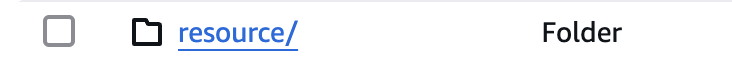

# Scrape Download, Then Upload to S3

## Scrape

In [12]:
scrape_url = 'https://www.census.gov/foreign-trade/schedules/c/country.txt'

In [13]:
save_scrape_at = getpass.getpass('Where to save the scraped file? ')

Where to save the scraped file? ········


In [ ]:
# clear output that shows actual local path where scraped data is stored
request.urlretrieve(scrape_url,save_scrape_at)

In [16]:
country_label = open(save_scrape_at, "r").read()

## Upload

In [18]:
conn.put_object(Body = country_label, Bucket = my_bucket, Key = 'resource/country.txt')

{'ResponseMetadata': {'RequestId': 'SPYNW0NHVZVW259Y',
  'HostId': 'X1h6VGbBc6uYgOM0ftdlkvxIxiKv6qs5qv95Ts6uIS0PKveUAyTobARefTVx3Lrr0hUy0vjM4/qrarf/Bqh7ELGdJmEP4fhK',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'X1h6VGbBc6uYgOM0ftdlkvxIxiKv6qs5qv95Ts6uIS0PKveUAyTobARefTVx3Lrr0hUy0vjM4/qrarf/Bqh7ELGdJmEP4fhK',
   'x-amz-request-id': 'SPYNW0NHVZVW259Y',
   'date': 'Fri, 28 Mar 2025 02:13:37 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"5c875e7479d0a76b903f67afbf1d4b93"',
   'x-amz-checksum-crc64nvme': 'wlwJ7Uh9F1s=',
   'x-amz-checksum-type': 'FULL_OBJECT',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"5c875e7479d0a76b903f67afbf1d4b93"',
 'ServerSideEncryption': 'AES256'}

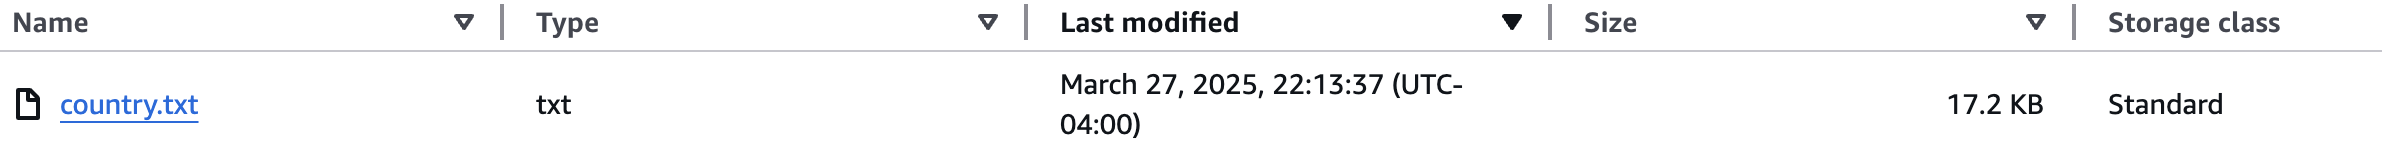